# Benchmarks
---
**Description**:

From this notebook we can run all the *multimodal benchmark* functions.

---

## Step 1: Import python libraries and set up the project directory

In [12]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

# Enable LaTex in plotting.
plt.rcParams["text.usetex"] = True

PROJECT_DIR = os.path.abspath('..')

if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

## Step 2: Import the custom PSO code

In [13]:
from star_pso.population.swarm import Swarm
from star_pso.population.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.utils.auxiliary import cost_function

## Benchmark problems

In [14]:
# Dimensions: 1D
from star_pso.benchmarks.equal_maxima import EqualMaxima
from star_pso.benchmarks.five_uneven_peak_trap import FiveUnevenPeakTrap
from star_pso.benchmarks.uneven_decreasing_maxima import UnevenDecreasingMaxima

# Dimensions: 2D
from star_pso.benchmarks.himmelblau import Himmelblau
from star_pso.benchmarks.gaussian_mixture import GaussianMixture
from star_pso.benchmarks.six_hump_camel_back import SixHumpCamelBack

# Dimensions: N >= 2D
from star_pso.benchmarks.shubert import Shubert
from star_pso.benchmarks.vincent import Vincent
from star_pso.benchmarks.rastrigin import Rastrigin

# Composite function.
# Options are: ['f_ackley', 'f_sphere', 'f_rastrigin', 'f_griewank', 'f_weierstrass']
from star_pso.benchmarks.composite_functions import CompositeFunction

In [15]:
# Create a test problem.
benchmark = Himmelblau()

# Print the function we have selected.
print(benchmark)

Himmelblau(x_min=-6.0, x_max=6.0)


## Step 3: Define the objective function

In [16]:
@cost_function(minimize=False)
def func_benchmark(x_array: np.ndarray, **kwargs) -> float:
    # Return the solution.
    return benchmark.func(x_array).item()
# _end_def_

## Step 4: Set the PSO parameters

    - Number of particles 'N'
    - Initial population
    - PSO object

In [17]:
# Get an initial sample.
x_sample = benchmark.sample_random_positions(n_pos=100)

# Initial swarm population.
swarm_t0 = Swarm([Particle(x) for x in x_sample])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm = swarm_t0, obj_func = func_benchmark,
                       x_min = benchmark.x_min, x_max = benchmark.x_max)

## Step 5: Run the optimization process

In [18]:
test_PSO.run(max_it = 800, f_max_eval = 50_000, verbose = False,
             options = {"w0": 0.70, "c1": 1.50, "c2": 1.50, "mode": "multimodal"})

12/18/2025 11:07:54 INFO: Initial f_optimal = 193.9541
12/18/2025 11:07:56 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 200.0000
run: elapsed time = 2.004 seconds.


## Step 6: Extract the data for analysis and plotting

In [19]:
# Get the optimal solution from the PSO.
_, _, x_opt = test_PSO.get_optimal_values()

# Compute the final objective functions.
f_opt = benchmark.func(x_opt)

# Print the results.
print(f"x={x_opt}, f(x)={f_opt}")

x=[3.         1.99999998], f(x)=200.0


In [20]:
# Display the global optima.
gopt_found, gopt_total = benchmark.search_for_optima(test_PSO.swarm.best_n(test_PSO.swarm.size))

# Display the number of global optima found.
print(f"Found {gopt_found} out of {gopt_total} global optima.")

Found 4 out of 4 global optima.


### Visualize the 1D solutions

In [21]:
if benchmark.name in {"Equal_Maxima",
                      "Five_Uneven_Peak_Trap",
                      "Uneven_Decreasing_Maxima"}:
    # Extract the best_n particles.
    best_n = []

    # For 1D problems we extract their positions together
    # with their function values.
    for pt in test_PSO.swarm.best_n(test_PSO.swarm.size//2):
        best_n.append((pt.position.item(), pt.value))
    
    # Convert to numpy array.
    best_n = np.array(best_n)

    # Set a test range.
    x_test = np.linspace(benchmark.x_min, benchmark.x_max, 200)

    # Evaluate the test function.
    f_test = np.array([benchmark.func(xi) for xi in x_test])
    
    # Plot the test function.
    plt.plot(x_test, f_test, '-', linewidth=2, label="true function")
    
    # Plot the optimal PSO.
    plt.plot(x_opt, f_opt, 'kx', markersize=10, label="StarPSO opt.")
    
    # Plot the best_n.
    plt.plot(best_n[:, 0], best_n[:, 1], "k.", label="StarPSO best")
    
    # Set the x/y labels.
    plt.xlabel(r'\textbf{x}')
    plt.ylabel(r'\textbf{f(x)}')
    plt.title(benchmark.name)
    
    # Final set up.
    plt.grid(True)
    plt.legend()
    plt.show()

### Visualize the 2D solutions

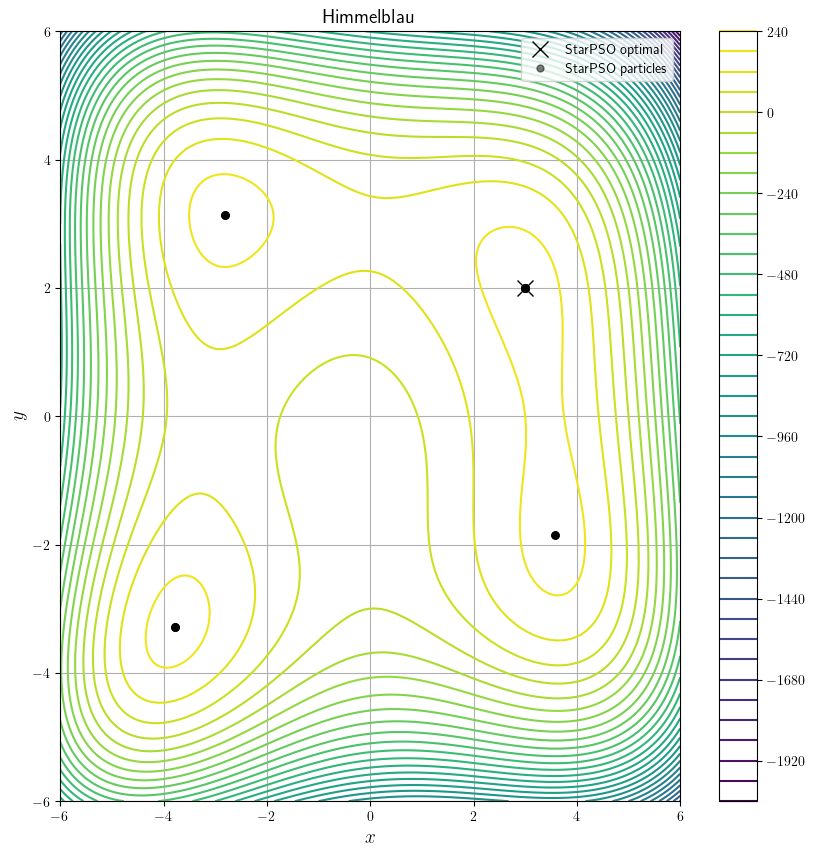

In [22]:
if benchmark.name in {"CF_2D",
                      "Himmelblau",
                      "Shubert_2D",
                      "Vincent_2D",
                      "Rastrigin_2D",
                      "GaussianMixture",
                      "Six_Hump_Camel_Back"}:
    # Extract the best_n particles.
    best_n = []

    # For 2D problems we extract only their positions.
    for pt in test_PSO.swarm.best_n(test_PSO.swarm.size//2):
        best_n.append(pt.position)
    
    # Convert to numpy array.
    best_n = np.array(best_n)

    # Sample sizes.
    nx, ny = 200, 200
    
    # Set a test range.
    if np.isscalar(benchmark.x_min):
        x_test = np.linspace(benchmark.x_min, benchmark.x_max, nx)
        y_test = np.linspace(benchmark.x_min, benchmark.x_max, ny)
        
    else:
        x_test = np.linspace(benchmark.x_min[0], benchmark.x_max[0], nx)
        y_test = np.linspace(benchmark.x_min[1], benchmark.x_max[1], ny)
        
    # Make the meshgrid for the contour plot.
    xv, yv = np.meshgrid(x_test, y_test)

    # Combine the x_test, y_test.
    pos = np.array([(xi, yi) for xi in x_test for yi in y_test])
    
    # Compute the function values.
    f_test = np.array([benchmark.func(p) for p in pos])

    plt.subplots(figsize=(10, 10))
    
    # First plot the contour of the "true" function.
    plt.contour(xv, yv, f_test.reshape(nx, ny).T, levels=40)
    
    # Plot the optimal PSO.
    plt.plot(x_opt[0], x_opt[1], "kx", markersize=12, label="StarPSO optimal")
    
    # Plot the best_n.
    plt.plot(best_n[:, 0], best_n[:, 1], "ko", alpha=0.5, markersize=5, label="StarPSO particles")
    
    # Add labels.
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14)
    plt.title(benchmark.name, fontsize=14)
    plt.legend()
    
    # Final setup.
    plt.colorbar()
    plt.grid()

    # Save to file.
    plt.savefig(f"{benchmark.name}.pdf", format="pdf", dpi=300)

### End of file